In [2]:
from pathlib import Path
import sys
import tensorflow as tf
from keras import Sequential, layers
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.applications import EfficientNetB0

ROOT = Path.cwd().parent
sys.path.insert(0, str(ROOT))

from bee_tector.data import load_datasets, undersample_dataset


train_ds, val_ds, test_ds = load_datasets()

train_ds, id_to_class = undersample_dataset()


def ensure_rgb(image, label):
    if image.shape[-1] != 3:
        image = tf.image.grayscale_to_rgb(image)
    return image, label

train_ds = train_ds.map(ensure_rgb)
val_ds = val_ds.map(ensure_rgb)
test_ds = test_ds.map(ensure_rgb)


def initialize_model(shape=(224, 224, 3), num_classes=12):
    base_model = EfficientNetB0(
        include_top=False,
        input_shape=shape,
        weights=None
    )
    base_model.trainable = True

    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(1e-4),
        metrics=['accuracy']
    )
    return model


model = initialize_model(shape=(224,224,3), num_classes=len(id_to_class))


es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[es], verbose=1)


val_loss, val_acc = model.evaluate(val_ds)
test_loss, test_acc = model.evaluate(test_ds)

print(f"Validation accuracy: {val_acc:.4f}, Test accuracy: {test_acc:.4f}")


Found 3619 files belonging to 12 classes.
Found 781 files belonging to 12 classes.
Found 781 files belonging to 12 classes.
Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 48s 897ms/step - accuracy: 0.1012 - loss: 2.5434 - val_accuracy: 0.0294 - val_loss: 2.4867
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 890ms/step - accuracy: 0.1106 - loss: 2.5048 - val_accuracy: 0.0294 - val_loss: 2.4941
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 882ms/step - accuracy: 0.1036 - loss: 2.4959 - val_accuracy: 0.0294 - val_loss: 2.4793
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 907ms/step - accuracy: 0.1075 - loss: 2.4742 - val_accuracy: 0.0294 - val_loss: 2.4864
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 907ms/step - accuracy: 0.1254 - loss: 2.4688 - val_accuracy: 0.0294 - val_loss: 2.4790
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 912ms/step - accuracy: 0.1293 - loss: 2.4600 - val_accuracy: 0.0294 - val_loss: 2.5014
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 888ms/step - accuracy: 0.1355 - loss: 2.4437 - val_accuracy:

In [3]:
from bee_tector.plots import plot_history

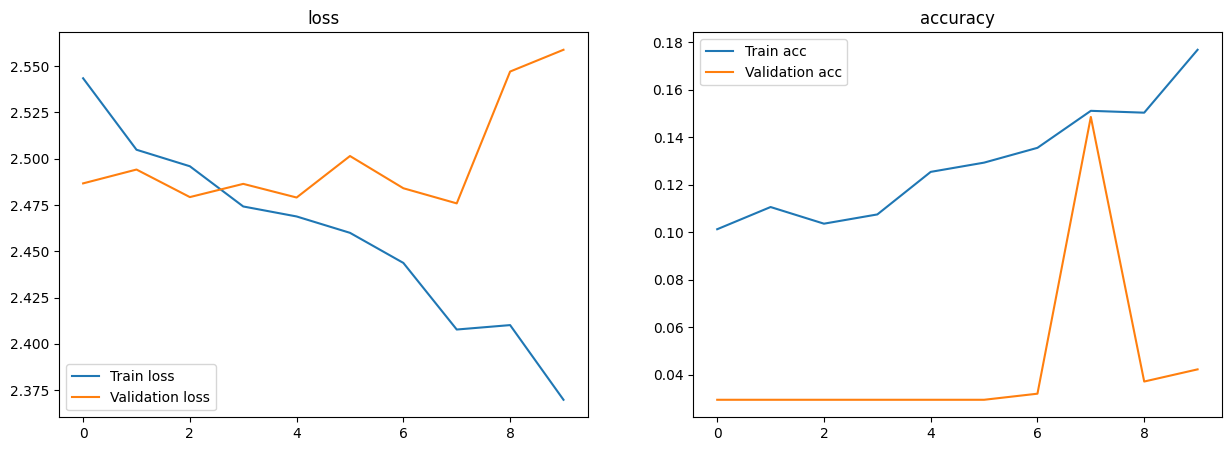

In [4]:
plot_history(history)